In [5]:
## WeightWatcher helps you choose the best pretrained model for your needs.

## You can use WeightWatcher to compare several pretrained models and choose the one with the lowest Log Norm.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8

from scipy.ndimage.interpolation import zoom
import VGG
import ResNet
import numpy as np
import os
import gradcamutils
from DenseNet import densenet
from PIL import Image
import weightwatcher as ww
from ResNet import *

In [18]:
# use this environment flag to change which GPU to use 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # specify which GPU(s) to be used

vggModel = VGG.VGG19((224,224,3),4)
vggModel.summary()
vggModel.load_weights("VGG19_COVID19.h5") #load weights

denseNetModel = densenet.DenseNetImageNet161(input_shape=(352,320,1),classes=4, weights=None)
denseNetModel.summary()
denseNetModel.load_weights("DenseNet161-COVID19.h5")

resNetModel = ResNet18((224, 224, 3), 4, False) 
resNetModel.summary()
resNetModel.load_weights("ResNet18_COVID19.h5")


Model: "densenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 352, 320, 1)  0                                            
__________________________________________________________________________________________________
conv2d_181 (Conv2D)             (None, 176, 160, 8)  392         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_183 (BatchN (None, 176, 160, 8)  32          conv2d_181[0][0]                 
__________________________________________________________________________________________________
activation_178 (Activation)     (None, 176, 160, 8)  0           batch_normalization_183[0][0]    
___________________________________________________________________________________________

In [8]:
vggWatcher = ww.WeightWatcher(model=vggModel)
resultsVGG = vggWatcher.analyze(alphas=True)

vggWatcher.print_results()
vggWatcher.get_summary()

vggWatcherDetails = vggWatcher.get_details(results=resultsVGG)

2020-04-06 13:36:42,952 INFO 

python      version 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
numpy       version 1.18.1
tensforflow version 1.14.0
keras       version 2.3.1
2020-04-06 13:36:42,954 INFO Analyzing model 'vgg19' with 27 layers
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
2020-04-06 13:36:48,938 INFO ### Printing results ###
2020-04-06 13:36:50,527 INFO Check: m

In [10]:
vggWatcher.analyze(layers=ww.LAYER_TYPE.CONV2D)

for layer_id, result in resultsVGG.items():
    for slice_id, summary in result.items():
        if not str(slice_id).isdigit() or "lognorm" not in summary:
            continue
        lognorm = summary["lognorm"]
        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))

2020-04-06 13:38:18,682 INFO Analyzing model 'vgg19' with 27 layers
2020-04-06 13:38:18,711 INFO ### Printing results ###
2020-04-06 13:38:20,197 INFO Check: min: 0.6080794334411621, max: 2.52199923992157, avg: 1.7278308049353475
2020-04-06 13:38:20,199 INFO Check compound: min: 0.7667776478661432, max: 2.097424887050916, avg: 1.6856587848359077
2020-04-06 13:38:20,200 INFO CheckTF: min: False, max: True, avg: 0.11851851851851852
2020-04-06 13:38:20,201 INFO CheckTF compound: min: 0.0, max: 1.0, avg: 0.16319444444444445


Layer 23, Slice 0: Lognorm: 1.311901569366455
Layer 25, Slice 0: Lognorm: 1.0489319562911987


In [11]:
resnetWatcher = ww.WeightWatcher(model=resNetModel)
resultsResNet = resnetWatcher.analyze(alphas=True)

resnetWatcher.print_results()
resnetWatcher.get_summary()

renetWatcherDetails = resnetWatcher.get_details(results=resultsResNet)

2020-04-06 13:38:32,258 INFO 

python      version 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
numpy       version 1.18.1
tensforflow version 1.14.0
keras       version 2.3.1
2020-04-06 13:38:32,260 INFO Analyzing model 'model_1' with 71 layers
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by 

In [14]:
resnetWatcher.analyze(layers=ww.LAYER_TYPE.CONV2D)

for layer_id, result in results.items():
    for slice_id, summary in result.items():
        if not str(slice_id).isdigit() or "lognorm" not in summary:
            continue
        lognorm = summary["lognorm"]
        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))

2020-02-17 23:44:47,209 INFO Analyzing model 'model_1' with 127 layers
2020-02-17 23:44:47,442 INFO ### Printing results ###
2020-02-17 23:44:51,547 INFO Check: min: 0.03055666800210663, max: 1.174803615616177, avg: 0.75461311809406
2020-02-17 23:44:51,548 INFO Check compound: min: 0.03055666800210663, max: 1.171422623526532, avg: 0.6850104940206393
2020-02-17 23:44:51,549 INFO CheckTF: min: False, max: True, avg: 0.8321917808219178
2020-02-17 23:44:51,549 INFO CheckTF compound: min: 0.0, max: 1.0, avg: 0.75
2020-02-17 23:44:51,550 INFO Norm: min: 2.481132745742798, max: 18.79686164855957, avg: 8.44815731048584
2020-02-17 23:44:51,551 INFO Norm compound: min: 2.522228717803955, max: 18.74276351928711, avg: 8.113859176635742
2020-02-17 23:44:51,551 INFO LogNorm: min: 0.3946499824523926, max: 1.2740854024887085, avg: 0.8404216170310974
2020-02-17 23:44:51,552 INFO LogNorm compound: min: 0.4017566442489624, max: 1.2728333473205566, avg: 0.8240067958831787
2020-02-17 23:44:51,553 INFO Norm

Layer 5, Slice 0: Lognorm: 0.45505785942077637
Layer 5, Slice 1: Lognorm: 0.466656893491745
Layer 5, Slice 2: Lognorm: 0.4717792868614197
Layer 5, Slice 3: Lognorm: 0.46813076734542847
Layer 5, Slice 4: Lognorm: 0.46588632464408875
Layer 5, Slice 5: Lognorm: 0.47582072019577026
Layer 5, Slice 6: Lognorm: 0.464699387550354
Layer 5, Slice 7: Lognorm: 0.4623936414718628
Layer 5, Slice 8: Lognorm: 0.46986302733421326
Layer 7, Slice 0: Lognorm: 0.457430899143219
Layer 10, Slice 0: Lognorm: 0.4125364422798157
Layer 10, Slice 1: Lognorm: 0.4140439033508301
Layer 10, Slice 2: Lognorm: 0.4220924377441406
Layer 10, Slice 3: Lognorm: 0.4108112156391144
Layer 10, Slice 4: Lognorm: 0.4176965057849884
Layer 10, Slice 5: Lognorm: 0.4095495045185089
Layer 10, Slice 6: Lognorm: 0.41007551550865173
Layer 10, Slice 7: Lognorm: 0.4107871353626251
Layer 10, Slice 8: Lognorm: 0.41786688566207886
Layer 14, Slice 0: Lognorm: 0.42499804496765137
Layer 14, Slice 1: Lognorm: 0.40750980377197266
Layer 14, Slice 2

In [19]:
densenetWatcher = ww.WeightWatcher(model=denseNetModel)
resultsDenseNet = densenetWatcher.analyze(alphas=True)

densenetWatcher.print_results()
densenetWatcher.get_summary()

densenetWatcherDetails = densenetWatcher.get_details(results=resultsDenseNet)

2020-04-06 13:51:18,182 INFO 

python      version 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
numpy       version 1.18.1
tensforflow version 1.14.0
keras       version 2.3.1
2020-04-06 13:51:18,184 INFO Analyzing model 'densenet' with 567 layers
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/reza/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
2020-04-06 13:52:12,459 INFO ### Printing results ###
2020-04-06 13:52:25,520 INFO Chec

In [21]:
resnetWatcher.analyze(layers=ww.LAYER_TYPE.CONV2D)

for layer_id, result in resultsDenseNet.items():
    for slice_id, summary in result.items():
        if not str(slice_id).isdigit() or "lognorm" not in summary:
            continue
        lognorm = summary["lognorm"]
        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))

2020-04-06 13:54:16,000 INFO Analyzing model 'model_1' with 71 layers
2020-04-06 13:54:16,174 INFO ### Printing results ###
2020-04-06 13:54:18,850 INFO Check: min: 0.0687838253571731, max: 2.6714299045925975, avg: 1.8444980563213305
2020-04-06 13:54:18,852 INFO Check compound: min: 0.0687838253571731, max: 2.644141827897842, avg: 1.4558819691049196
2020-04-06 13:54:18,853 INFO CheckTF: min: False, max: True, avg: 0.36548223350253806
2020-04-06 13:54:18,854 INFO CheckTF compound: min: 0.0, max: 1.0, avg: 0.38095238095238093
2020-04-06 13:54:18,854 INFO Norm: min: 5.872817039489746, max: 42.411502838134766, avg: 18.97556495666504
2020-04-06 13:54:18,855 INFO Norm compound: min: 5.987733840942383, max: 42.30625915527344, avg: 17.617650985717773
2020-04-06 13:54:18,856 INFO LogNorm: min: 0.7688464522361755, max: 1.627483606338501, avg: 1.1756139993667603
2020-04-06 13:54:18,856 INFO LogNorm compound: min: 0.7772339582443237, max: 1.6264044046401978, avg: 1.1485332250595093
2020-04-06 13:5

Layer 137, Slice 0: Lognorm: 0.9874663352966309
Layer 393, Slice 0: Lognorm: 1.2084145545959473


In [14]:
## WeightWatcher helps you choose the best pretrained model for your needs.

## You can use WeightWatcher to compare several pretrained models and choose the one with the lowest Log Norm.

Text(0.5, 0, 'Weighted alpha')

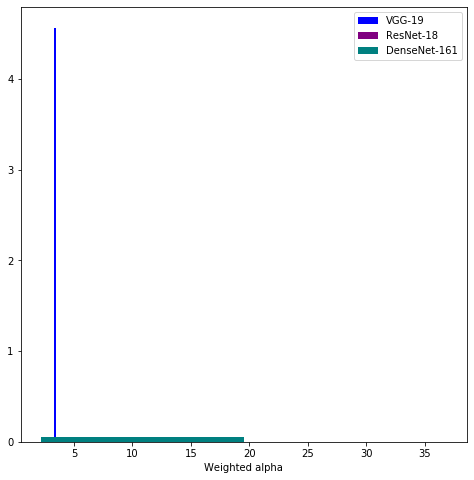

In [34]:
y = vggWatcherDetails.alpha.to_numpy()
plt.hist(y, bins=2, alpha=1, color='blue', label='VGG-19', density=True);
y = renetWatcherDetails.alpha.to_numpy()
plt.hist(y, bins=2, alpha=1, color='purple', label='ResNet-18', density=True);
y = renetWatcherDetails.alpha.to_numpy()
plt.hist(y, bins=2, alpha=1, color='teal', label='DenseNet-161', density=True);

plt.legend()
plt.xlabel("Weighted alpha")

Text(0.5, 0, 'Log-norm')

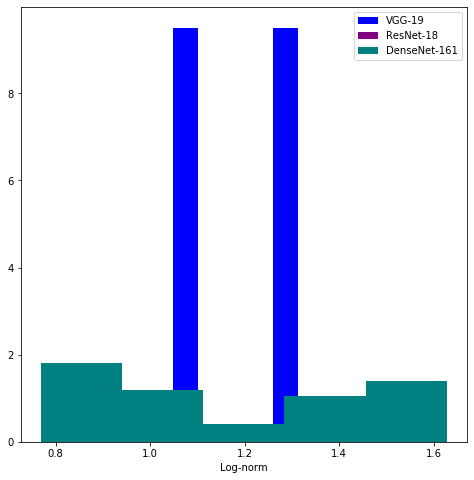

In [30]:
y = vggWatcherDetails.lognorm.to_numpy()
plt.hist(y, bins=5, alpha=1, color='blue', label='VGG-19', density=True);
y = renetWatcherDetails.lognorm.to_numpy()
plt.hist(y, bins=5, alpha=1, color='purple', label='ResNet-18', density=True);
y = renetWatcherDetails.lognorm.to_numpy()
plt.hist(y, bins=5, alpha=1, color='teal', label='DenseNet-161', density=True);

plt.legend()
plt.xlabel("Log-norm")